In [10]:
%pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import kagglehub
import pandas as pd
import os

# Téléchargement du dataset avec kagglehub
path = kagglehub.dataset_download("prathamsaraf1389/spotify-global-top-50-daily-update")

print("SPOTIFYYYYYY :", path)

# Chargement du fichier CSV dans un DataFrame
file_path = os.path.join(path, "spotify_global_top_50_daily_update.csv")  # Remplace par le nom exact si nécessaire
spotify_data = pd.read_csv(file_path)

# Affiche un aperçu des données
print(spotify_data.head())


SPOTIFYYYYYY : C:\Users\camil\.cache\kagglehub\datasets\prathamsaraf1389\spotify-global-top-50-daily-update\versions\315


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\camil\\.cache\\kagglehub\\datasets\\prathamsaraf1389\\spotify-global-top-50-daily-update\\versions\\315\\spotify_global_top_50_daily_update.csv'

In [7]:
import os

# Chemin du dossier contenant le dataset
directory_path = r"C:\Users\camil\.cache\kagglehub\datasets\prathamsaraf1389\spotify-global-top-50-daily-update\versions\315"

# Lister tous les fichiers dans le dossier
files = os.listdir(directory_path)
print("Fichiers dans le répertoire :", files)


Fichiers dans le répertoire : ['images', 'playlist.csv']


In [8]:
import pandas as pd

# Remplace "nom_du_fichier.csv" par le nom exact trouvé
file_path = os.path.join(directory_path, "playlist.csv")
spotify_data = pd.read_csv(file_path)

# Afficher un aperçu des données
print(spotify_data.head())


           track_name track_add_date track_add_time  multiple_artists_bool  \
0             Flowers     2023-03-31       10:02:16                  False   
1           Kill Bill     2023-03-31       10:02:16                  False   
2                 TQG     2023-03-31       10:02:16                   True   
3                BESO     2023-03-31       10:02:16                   True   
4  Boy's a liar Pt. 2     2023-03-31       10:02:16                   True   

                   name_of_artists               album_name  \
0                  ['Miley Cyrus']  Endless Summer Vacation   
1                          ['SZA']                      SOS   
2           ['KAROL G', 'Shakira']       MAÑANA SERÁ BONITO   
3    ['ROSALÍA', 'Rauw Alejandro']                       RR   
4  ['PinkPantheress', 'Ice Spice']       Boy's a liar Pt. 2   

  album_release_date album_release_date_precision  number_of_tracks_in_album  \
0         2023-03-10                          day                       

In [14]:
spotify_data.count()

track_name                      15550
track_add_date                  15550
track_add_time                  15550
multiple_artists_bool           15550
name_of_artists                 15550
album_name                      15550
album_release_date              15550
album_release_date_precision    15550
number_of_tracks_in_album       15550
position_in_playlist            15550
track_duration_ms               15550
track_popularity                15550
track_explicit                  15550
images_path                     15550
data_collection_date            15550
dtype: int64

In [5]:
unique_counts = spotify_data['track_name'].value_counts().nunique()

print(spotify_data['track_duration_ms'])


NameError: name 'spotify_data' is not defined

In [26]:
popularity_by_artist = spotify_data.groupby('name_of_artists')['track_popularity'].mean().sort_values(ascending=False).head(10)
print("Popularité moyenne des morceaux par artiste :\n", popularity_by_artist)


Popularité moyenne des morceaux par artiste :
 name_of_artists
['Lady Gaga', 'Bruno Mars']                                               99.846154
['¥$', 'Kanye West', 'Ty Dolla $ign', 'Rich The Kid', 'Playboi Carti']    97.000000
['Yng Lvcas', 'Peso Pluma']                                               96.765027
['PinkPantheress', 'Ice Spice']                                           96.333333
['iñigo quintero']                                                        96.287234
['Myke Towers']                                                           96.237569
['Mitski']                                                                96.166667
['Bizarrap', 'Shakira']                                                   95.803279
['KAROL G', 'Shakira']                                                    95.777778
['Bad Bunny', 'Feid']                                                     95.627660
Name: track_popularity, dtype: float64


In [29]:
top_artists = spotify_data['name_of_artists'].value_counts().head(10)
print("Top 10 des artistes les plus fréquents :\n", top_artists)


Top 10 des artistes les plus fréquents :
 name_of_artists
['Taylor Swift']               1077
['Olivia Rodrigo']              348
['SZA']                         340
['Miley Cyrus']                 331
['Arctic Monkeys']              308
['Harry Styles']                269
['David Kushner']               255
['Doja Cat']                    252
['Bad Bunny']                   242
['The Weeknd', 'Daft Punk']     242
Name: count, dtype: int64


In [13]:
spotify_data['track_duration_min'] = spotify_data['track_duration_ms'] / 60000


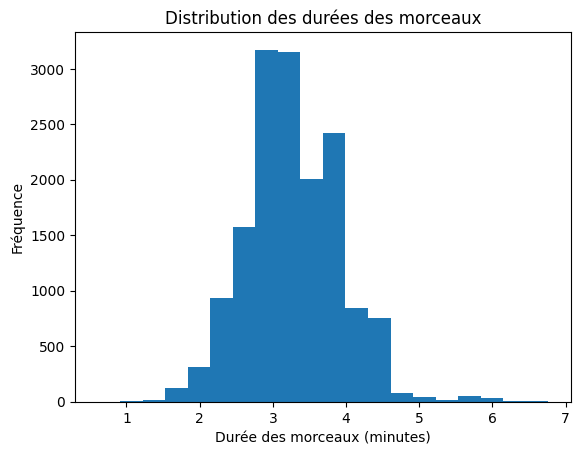

In [14]:
import matplotlib.pyplot as plt

plt.hist(spotify_data['track_duration_min'], bins=20)
plt.xlabel("Durée des morceaux (minutes)")
plt.ylabel("Fréquence")
plt.title("Distribution des durées des morceaux")
plt.show()


C:\Users\camil\AppData\Local\Temp\ipykernel_6168\3907268588.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  christmas_track_data['track_add_date'] = pd.to_datetime(christmas_track_data['track_add_date'])


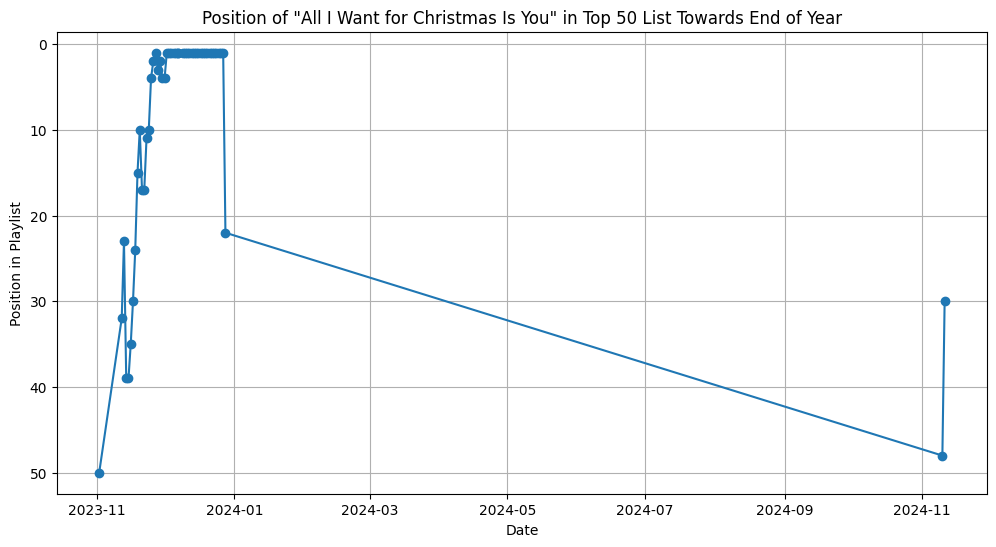

In [15]:
import matplotlib.pyplot as plt

# Filter the data for "All I Want for Christmas Is You"
christmas_track_data = spotify_data[spotify_data['track_name'] == "All I Want for Christmas Is You"]

# Convert 'track_add_date' to datetime if not already
christmas_track_data['track_add_date'] = pd.to_datetime(christmas_track_data['track_add_date'])

# Filter data for the end of the year
end_of_year_data = christmas_track_data[christmas_track_data['track_add_date'].dt.month.isin([11, 12])]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(end_of_year_data['track_add_date'], end_of_year_data['position_in_playlist'], marker='o', linestyle='-')
plt.gca().invert_yaxis()  # Invert y-axis to show rank 1 at the top
plt.title('Position of "All I Want for Christmas Is You" in Top 50 List Towards End of Year')
plt.xlabel('Date')
plt.ylabel('Position in Playlist')
plt.grid(True)
plt.show()